1.0 Introduction

The Crime Incident Report is provided by Toronto Police Services (TPS) to record preliminary details of incidents to which TPS officers respond. It is a dataset containing records from the new Crime Incident Reporting System, which includes a reduced set of fields focused on capturing the type of incident and when and where it occurred. (Records begin in 2004 and continue through 2022).

In [95]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import sys, os
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

2.0 Data cleaning

In [97]:
TPS = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/MMAI-5000/main/Group%20Project%20Data-SFD%20Data-Toronto%20Police.csv')

In [98]:
TPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

3.0 CSV infomration

Toronto Police Sevice Data includes 18 features that are:

1  EVENT_UNIQUE_ID : Offence Number
2  OCC_DATE  : Date Offence Occurred (time is displayed in UTC lormat when downloaded as a CSV)
3  OCC_YEAR  : Year Offence Occurred
4  OCC_MONTH : Month Offence Occurred        
5  OCC_DOW   : Day of the Week Offence Occurred      
6  OCC_DOY   : Day of the Year Offence Occurred          
7  OCC_DAY   : Day of the Month Offence Occurred       
8  OCC_HOUR  : Hour of Day Offence Occurred         
9  OCC_TIME_RANGE :Time Range of Day Offence Occurred             
10 DIVISION  : Police Division where Offence Occurred   
11 DEATH :Count of Deaths caused by the Shooting    
12 INJURIES  : Count of Injured Persons caused by the Shooting           
13 HOOD_158  : Identifier of Neighbourhood using Cily of Toronto's new 158 neighbourhood structure          
14 NEIGHBOURHOOD_158 : Name of Neighbourhood using City of Toronto's new 158 neighbourood structure        
15 HOOD_140   : Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure
16 NEIGHBOURHOOD_140  : Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure          
17 LONG_WGS84  :longitude Coordinates (Offset to nearest intersection)
18  LAT_WGS84  : Latitude Coordinates (Offset to nearest intersection)     

In [99]:
print(TPS.shape)
print(TPS.columns)

(5707, 21)
Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')


In [100]:
print(TPS.isna().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


Based on this we can know that there is no missing values, but we still need to clean some area data, if it is necessary for some point. Such us TPS Crime Map analysis, but in this point, we don't apply it. 

In [101]:
TPS.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


4.0 Total Case by year

In [102]:
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
counts = {}
for year in years:
    counts[year] = TPS[TPS['OCC_YEAR'] == year].shape[0]
for year, count in counts.items():
    print(f"{year} Total Case ：{count}")

2004 Total Case ：191
2005 Total Case ：262
2006 Total Case ：215
2007 Total Case ：207
2008 Total Case ：238
2009 Total Case ：252
2010 Total Case ：259
2011 Total Case ：227
2012 Total Case ：219
2013 Total Case ：204
2014 Total Case ：177
2015 Total Case ：288
2016 Total Case ：407
2017 Total Case ：392
2018 Total Case ：427
2019 Total Case ：492
2020 Total Case ：462
2021 Total Case ：409
2022 Total Case ：379


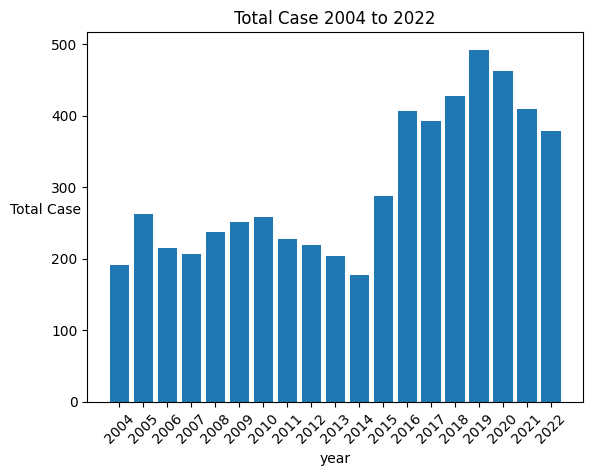

In [103]:
plt.bar(counts.keys(), counts.values())
plt.xlabel('year')
plt.ylabel('Total Case', rotation= 0)
plt.title('Total Case 2004 to 2022')
plt.xticks(years, rotation=45)
plt.show()

Based on the statistics of the number of crimes per year, the highest number of crimes was in 2019, when the number of crimes reached 492 cases, the peak of this almost 20 years. Among them, we can find crime keys concentrated in the years 2018 to 2020, with 427, 492, and 462 cases respectively.

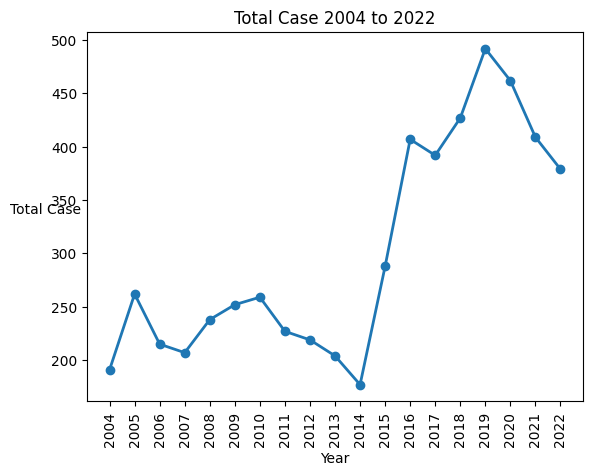

In [104]:
plt.plot(counts.keys(), counts.values(), marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Case', rotation= 0)
plt.title('Total Case 2004 to 2022')
plt.xticks(list(counts.keys()), list(counts.keys()), rotation=90)
plt.show()

Looking at the line chart that displays the Total Case from 2004 to 2022, it is evident that there was a significant surge in cases during the years 2014-2016, with a rise of 230 cases.

5.0 Divison number count:

From this statistic, we can know how many division they have, and the police division name.

In [105]:
DIVISION_UNIQUE_NAME = ['D31', 'D54', 'D55', 'D52', 'D11', 'D33', 'D13', 'D22', 'D14', 'D23', 'D51', 'D41', 'D32', 'D43', 'D12', 'D42', 'D53']
counts = {}
for DIVISION in DIVISION_UNIQUE_NAME:
    counts[DIVISION] = TPS[TPS['DIVISION'] == DIVISION].shape[0]
for DIVISION, count in counts.items():
    print(f"{DIVISION} Total Numer ：{count}")

D31 Total Numer ：998
D54 Total Numer ：261
D55 Total Numer ：132
D52 Total Numer ：142
D11 Total Numer ：157
D33 Total Numer ：185
D13 Total Numer ：189
D22 Total Numer ：215
D14 Total Numer ：313
D23 Total Numer ：622
D51 Total Numer ：332
D41 Total Numer ：336
D32 Total Numer ：345
D43 Total Numer ：445
D12 Total Numer ：466
D42 Total Numer ：477
D53 Total Numer ：92


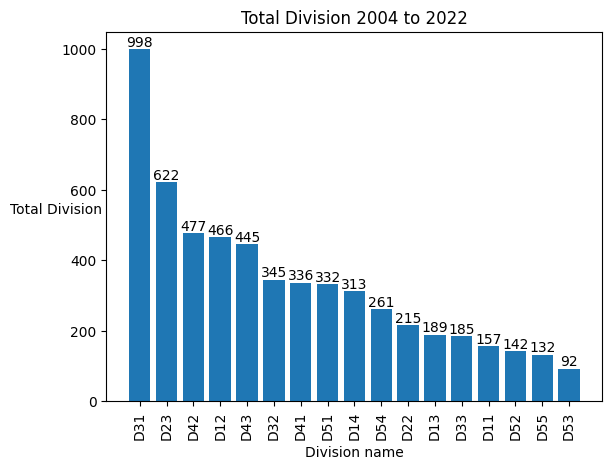

In [106]:
sorted_keys = sorted(counts.keys(), key=lambda x: counts[x], reverse=True)
sorted_values = [counts[key] for key in sorted_keys]

plt.bar(sorted_keys, sorted_values)
plt.xlabel('Division name')
plt.ylabel('Total Division', rotation=0)
plt.title('Total Division 2004 to 2022')
plt.xticks(rotation=90)

for i, key in enumerate(sorted_keys):
    count = counts[key]
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Between 2004 and 2022, we have seen varying occurrences of different "Divisions". Among them, "D 31" is the most frequent, followed by "D 23" and "D 42". On the other hand, "D55" and "D53" have relatively few occurrences. Interestingly, "D13" and "D33" have a similar number of occurrences.

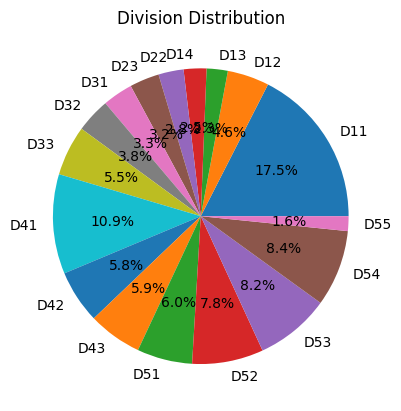

In [107]:
labels = ['D11', 'D12', 'D13', 'D14', 'D22', 'D23', 'D31', 'D32', 'D33', 'D41', 'D42', 'D43', 'D51', 'D52', 'D53', 'D54', 'D55']
sizes = counts.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Division Distribution')

plt.show()


Based on this pie chart, it show a largest portion is D11 which is around 17.5%, and then D41, it took up 10.9%.

In [108]:
TPS['OCC_DATE'] = pd.to_datetime(TPS['OCC_DATE'], format='%Y/%m/%d %H:%M:%S%z', utc=True)
TPS.set_index('OCC_DATE', inplace=True)

In [109]:
start_date = '2004-01-01'
end_date = '2022-12-31'
filtered_df = TPS.loc[start_date:end_date]

C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_32188\4200838254.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtered_df = TPS.loc[start_date:end_date]


In [110]:
filtered_df['weekday'] = filtered_df.index.weekday
counts = filtered_df['weekday'].value_counts().sort_index()
print(counts)

0    784
1    726
2    720
3    707
4    804
5    971
6    995
Name: weekday, dtype: int64


C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_32188\3634266041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weekday'] = filtered_df.index.weekday


From here, we should transfer the number 0-6 to format Monday - Sunday

In [111]:
counts = {0: 784, 1: 726, 2: 720, 3: 707, 4: 804, 5: 971, 6: 995}
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
mapped_counts = {weekdays[key]: value for key, value in counts.items()}
for weekday, count in mapped_counts.items():
    print(weekday, count)

Monday 784
Tuesday 726
Wednesday 720
Thursday 707
Friday 804
Saturday 971
Sunday 995


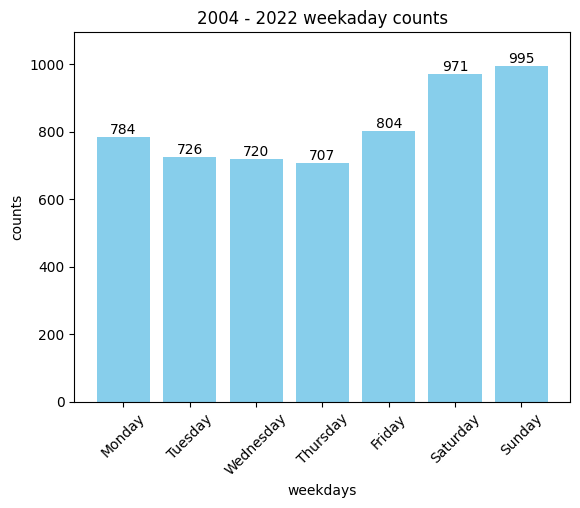

In [112]:
x_labels = [weekdays[key] for key in counts.keys()]
y_values = list(counts.values())
plt.bar(x_labels, y_values, color='skyblue')
plt.title('2004 - 2022 weekaday counts')
plt.xlabel('weekdays')
plt.xticks(rotation=45)
plt.ylabel('counts')
plt.ylim([0, max(y_values) + 100])
for i in range(len(x_labels)):
    plt.text(x_labels[i], y_values[i], str(y_values[i]), ha='center', va='bottom')
plt.show()

From here is for deaths case in each year

In [113]:
yearly_deaths = TPS.groupby('OCC_YEAR')['DEATH'].sum()
years = yearly_deaths.index
deaths = yearly_deaths.values
print(years)
print(deaths)

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='OCC_YEAR')
[26 53 29 44 37 37 32 28 34 22 27 26 41 39 51 44 39 46 44]


From the data analysis, we can figure which number is largest, The number of deaths is the highest, but it does not mean that the year is the most dangerous, so we have to progress to study other external factors, such as epidemics, inflation, welfare and other policies.

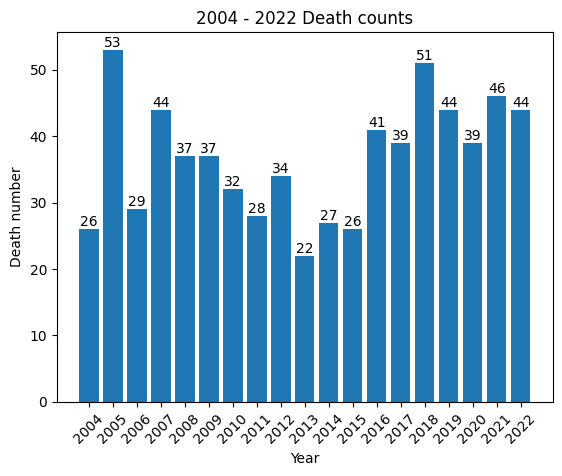

In [114]:
plt.bar(years, deaths)
plt.title('2004 - 2022 Death counts')
plt.xlabel('Year')
plt.ylabel('Death number')
plt.xticks(years, rotation=45)
for i, death in enumerate(deaths):
    plt.text(years[i], death, str(death), ha='center', va='bottom')
plt.show()

From here is Injuries case number for each year

In [115]:
yearly_injuries = TPS.groupby('OCC_YEAR')['INJURIES'].sum()
years = yearly_injuries.index
injuries = yearly_injuries.values
print(years)
print(injuries)

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='OCC_YEAR')
[ 96 178 173 129 171 144 138 113 114 119  76 126 152 148 178 240 178 163
 150]


In [116]:
import numpy as np

In [117]:
years = np.arange(2004, 2023)

In [118]:
injuries_per_year = []
for year in years:
    total_injuries = TPS[TPS['OCC_YEAR'] == year]['INJURIES'].sum()
    injuries_per_year.append(total_injuries)

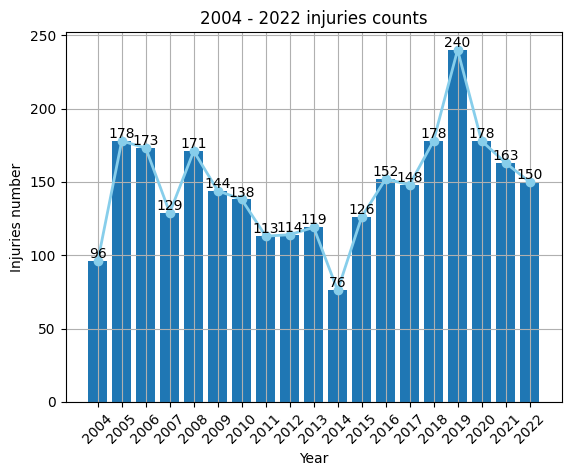

In [119]:
plt.bar(years, injuries)
plt.plot(years, injuries_per_year, color='skyblue', marker='o', linestyle='-', linewidth=2)
plt.grid(True)
plt.title('2004 - 2022 injuries counts')
plt.xlabel('Year')
plt.ylabel('Injuries number')
plt.xticks(years, rotation=45)
for i, injuries in enumerate(injuries):
    plt.text(years[i], injuries, str(injuries), ha='center', va='bottom')
plt.show()